# UTSA CS 3793/5233: Assignment-3

**Last Name - First Name - (abc123)**






## Learning Objectives

Implement 2 different machine learning algorithms
*   Stochastic Gradient Descent
*   ID3 Decision Tree


In [480]:
#from google.colab import drive
#drive.mount('/content/drive')


## Description

This assignment is focused on **machine learning**, mainly on the implementation of 2 different algorithms - Stochastic Gradient Descent & ID3 decision tree. 
The assignment is divided into two sections, each for one unique ML algorithm. 

The base structure and comments are provided on what should be done. You can use some libraries that help support you for the successful completion of the assignment. However, you **CANNOT** use a complete library that contains the implementation of ML algorithms. You can get pieces of code from online, but please cite the source properly.


##Import Libraries

Write all the import statements here. This should be for both algorithm implmentations. As mentioned before, you can not use any premade ML libraries.

In [481]:
# import all required libraries
import sys
import pandas as pd
import numpy as np
from scipy.special import expit
import matplotlib.pyplot as plt
import copy
import math

In [482]:
# Assume that the data files are in the following folder -- THIS WILL BE USED BY THE TA
basePath = "/content/drive/My Drive/Colab Notebooks/Artificial Intelligence/Data/"


In [483]:
basePath = "./"

#Stochastic Gradient Descent

In this section, you will implement the Stochastic Gradient Descent algorithm. The training is for a **binary classification** task i.e. each instance will have a class value of 0 or 1. Also, assume that you are given **all binary-valued attributes** and that there are **no missing values** in the train or test data. 


##Algorithm

(40 points)

Following are the data files that will be provided to you for the gradient descent algorithm implementation.

*   Training file - 'gd-train.dat'
*   Testing file - 'gd-test.dat'

In these files, only non-space characters are relevant. The first line contains the attribute names. All the other lines are different example instances to be used for the algorithm. Each column holds values of the attributes, whereas the last column holds the class label for that instance.

Write the code in the following code block, structure is provided. Instructions on the steps to follow are provided as comments.



In [484]:
# Data file name variables
train = basePath + "gd-train.dat"
test = basePath + "gd-test.dat"


In [485]:
# Read the training and testing data files
trainData = pd.read_csv(train, sep='\t')
testData = pd.read_csv(test, sep='\t')

In [486]:
# Activation Function - implement Sigmoid
def activation_function(h):
    return expit(h)
    

In [487]:
# Train the model using the given training dataset and the learning rate
# return the "weights" learnt for the perceptron - include the weight assocaited with bias as the last entry
def train(trainData, learning_rate=0.05):
  # initialize weights to 0
  weights = np.zeros(trainData.shape[1])
  # go through each training data instance
  for i in range(len(trainData)):
    # get 'x' as one multi-variate data instance and 'y' as the ground truth class label
    row = trainData.iloc[i].values.tolist()
    x = row[0:13]
    x.append(1)
    y = row[13]
    # obtain h(x)
    h = np.dot(x, weights)
    # call the activation function with 'h' as parameter to obtain 'z'
    z = activation_function(h)
    # update all weights individually using learning_rate, (y-z), and the corresponding 'x'
    for j in range(len(weights)):
      weights[j] += learning_rate * (y-z) * x[j]
  # return the final learnt weights
  return weights

In [488]:
# Test the model (weights learnt) using the given test dataset
# return the accuracy value
def test(test_data, weights, threshold):
  # go through each testing data instance
  correct = 0
  incorrect = 0
  #print(type(test_data), len(test_data), len(weights))
  for i in range(len(test_data)):
    # get 'x' as one multi-variate data instance and 'y' as the ground truth class label
    row = test_data.iloc[i].values.tolist()
    x = row[0:13]
    x.append(1)
    y = row[13]
    # obtain h(x)
    h = np.dot(x, weights)
    # call the activation function with 'h' as parameter to obtain 'z'
    z = activation_function(h)
    # use 'threshold' to convert 'z' to either 0 or 1 so as to match to the ground truth binary labels
    z = 1 if z >= threshold else 0
    # compare the thresholded 'z' with 'y' to calculate the positive and negative instances for calculating accuracy
    if z == y:
      correct += 1
    else:
      incorrect += 1
    #print("Row",i,"After rounding",h,z,y)
  # return the accuracy value for the given test dataset
  
  return correct / (correct + incorrect)
    

In [489]:
# Gradient Descent function
def gradient_descent(df_train, df_test, learning_rate=0.05, threshold=0.5):
    # call the train function to train the model and obtain the weights
    trainWeights = train(df_train, learning_rate)
    # call the test function with the training dataset to obtain the training accuracy
    trainAccuracy = test(df_train, trainWeights, threshold)
    # call the test function with the testing dataset to obtain the testing accuracy
    testAccuracy = test(df_test, trainWeights, threshold)
    # return (trainAccuracy, testAccuracy)
    return trainAccuracy, testAccuracy

In [490]:
# Threshold of 0.5 will be used to classify the instance for the test. If the value is >= 0.5, classify as 1 or else 0.
threshold = 0.5
#train(trainData)


In [491]:
# Main algorithm loop
# Loop through all the different learning rates [0.05, 1]
    # For each learning rate selected, call the gradient descent function to obtain the train and test accuracy values
    # Print both the accuracy values as "Accuracy for LR of 0.1 on Training set = x %" OR "Accuracy for LR of 0.1 on Testing set = x %"
learningRates = [.05, .10, .15 , .20, .25, .30, .35, .40, .45, .50, .55, .60, .65, .70, .75, .80, .85, .90, .95, 1]
lr2 = [.05]
trainResults = []
testResults = []
for lr in learningRates:
  results = gradient_descent(trainData, testData, lr)
  trainResults.append(results[0])
  testResults.append(results[1])
  print("Test with learning rate:",lr)
  print("trainAccuracy: ", results[0])
  print("testAccuracy: ",results[1])
  print("***************************")
  print()

##Extra Credit - Accuracy Plots

(05 points)

Use the above accuracy results on the training and testing data and write code to plot the graphs as mentioned in the code block below.



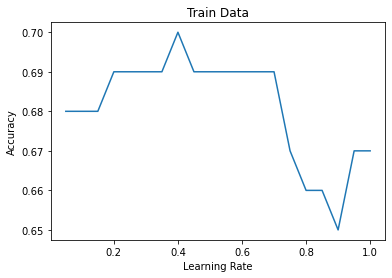

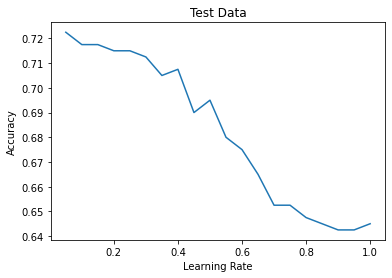

In [492]:
# Plot the graphs for accuracy results.
# There will be 2 graphs - one for training data and the other for testing data
# For each graph,
    # X-axis will be the learning rate going from 0.05-1 in increments on 0.05
    # Y-axis will be the accuracy values at the selected learning rate.
plt.plot(learningRates, trainResults, label='Training Accuracy')
plt.xlabel('Learning Rate')
plt.ylabel('Accuracy')
plt.title('Train Data')
plt.show()

plt.plot(learningRates, testResults, label='Test Accuracy')
plt.xlabel('Learning Rate')
plt.ylabel('Accuracy')
plt.title('Test Data')
plt.show()


#ID3 Decision Tree

In this section, you will implement the ID3 Decision Tree algorithm. The training is for a **binary classification** task i.e. each instance will have a class value of 0 or 1. Also, assume that there are **no missing values** in the train or test data. 


## Algorithm

(85 points)

Following are the data files that will be provided to you for the ID3 algorithm implementation.

*   Training file - 'id3-train.dat'
*   Testing file - 'id3-test.dat'

In these files, only non-space characters are relevant. The first line contains the attribute names. All the other lines are example instances to be used for the algorithm. Each column holds values of the attributes, whereas the last column holds the class label for that instance.

In a decision tree, if you reach a leaf node but still have examples that belong to different classes, then choose the most frequent class (among the instances at the leaf node). If you reach a leaf node in the decision tree and have no examples left or the examples are equally split among multiple classes, then choose the class that is most frequent in the entire training set. You do not need to implement pruning. Also, don’t forget to use logarithm base 2 when computing entropy and set (0 log 0) to 0.

Write the code in the following code block, structure is provided. Instructions on the steps to follow are provided as comments. The code should output the following 3 things:

*   Print the Decision Tree created, in the following example format:

    ```
    attr1 = 0 :
        attr2 = 0 :
            attr3 = 0 : 1 -- 4
            attr3 = 1 : 0 -- 9
        attr2 = 1 :
            attr4 = 0 : 0 -- 2
            attr4 = 1 : 1 -- 10
    attr1 = 1 :
        attr2 = 1 : 1 -- 17

    ```

*   Accuracy on the Training data = x %
*   Accuracy on the Test data = x %





In [493]:
# Data file name variables
train = basePath + "id3-train.dat"
test = basePath + "id3-test.dat"

In [494]:
#Tree Node
class Node:
  def __init__(self, parent=None):
    #which attr we need to split on, aka what we decided is the maxIG last node
    self.attr = None
    #children of this node, which are all the values of the feature
    self.children=[]
    #which class value the feature corresponds to, either pure or majority
    self.label = None
    #value of parent's attribute
    self.splitVal = None
    # the number of instances of the current feature with the split val specified by the parent
    self.count = None
    # the parent node
    self.parent = None


  

In [495]:
def dataEntropy(data, classLabel, classes):
  numInstances = data.shape[0]
  entropy = 0

  for c in classes:
    classCount = data[data[classLabel] == c].shape[0]
    classEntropy = - (classCount/numInstances)*np.log2(classCount/numInstances)
    entropy += classEntropy
  return entropy

In [496]:
def featureEntropy(data, classLabel, classes):
  count = data.shape[0]
  entropy = 0

  for c in classes:
    label_class_count = data[data[classLabel] == c].shape[0]
    entropy_class = 0
    if label_class_count != 0:
        probability_class = label_class_count/count
        entropy_class = - probability_class * np.log2(probability_class)
    entropy += entropy_class
  return entropy

In [497]:
def informationGain(featureName, trainData, classLabel, classes):
  features = trainData[featureName].unique() 
  numInstances = trainData.shape[0]
  featureInfo = 0.0
  
  for feature in features:
      featureData = trainData[trainData[featureName] == feature]
      numFeatureInstances = featureData.shape[0]
      currentEntropy = featureEntropy(featureData, classLabel, classes) 
      featureProbability = numFeatureInstances/numInstances
      featureInfo += featureProbability * currentEntropy 

  return dataEntropy(trainData, classLabel, classes) - featureInfo

In [498]:
def findMaxIG(trainData, label, classes, features):
  max = -1
  maxFeature = None
  
  for feature in features:
      currentFeatureGain = informationGain(feature, trainData, label, classes)
      if max < currentFeatureGain:
          max = currentFeatureGain
          maxFeature = feature

  return maxFeature

In [499]:
# get the majority feature label
def majorityLabel(data):
    # get the class labels
    labels = data['class'].unique()
    # initialize the majority label to None
    majority_label = labels[0]
    majCount = 0
    # go through each class label
    for label in labels:
        # get the count of the class label
        count = len(data[data['class']==label])
        # if the count is greater than the majority label update the majority label
        if count > majCount:
            majority_label = label
            majCount = count
    # return the majority label
    return majority_label

In [500]:
def printTree(root, level=0):
    # if the node is a leaf node
    tab = '\t' * level
    if root.attr is None:
        for child in root.children:
            printTree(child, level + 1)
    elif root.children == []:
        print(tab,root.attr, "=", root.splitVal, ":", root.label, "--", root.count)
    else:
        print(tab,root.attr, "=", root.splitVal, ":")
        for child in root.children:
            printTree(child, level + 1)

In [501]:
#data = a single instance from the data set
#root = the current node
def predictInstance(data, root):
    #if node doesn't have attribute, it's the root node, so go into the next one
    if root.attr == None:
        return predictInstance(data, root.children[0])

    #if root has a label, it's a leaf node. If that label == the instance class, then the prediction is correct
    if root.label != None:
        if root.label == (data['class'].values)[0]:
            return 1
        else:
            return 0
    #node is not a leaf node, meaning we don't have a label
    #the value of the column in the row is the child we need to enter
    #we need to check the value of the current attribute in the row
    splitVal = (data[root.attr].values)[0]


    #find which child represents that value, traverse to it.
    for child in root.children:
        if child.splitVal == splitVal:
            return predictInstance(data, child)

    return predictInstance(data, root.children[0])

In [502]:
# evaluate the prediction accuracy of the decision tree
def evaluate(root, data):
    # get the class labels
    labels = data['class'].unique()
    # initialize the prediction accuracy to 0
    correct = 0
    wrong = 0
    # go through each class label
    for i, row in data.iterrows():
        # get the count of the class label
        label = row['class']
        result = predict(root.children[0], row)
        result2 = predict(root.children[1], row)

        if result == label or result2 == label:
            correct += 1
        else:
            wrong += 1

    prediction_accuracy = correct / (correct + wrong)
    # return the prediction accuracy
    return prediction_accuracy

In [503]:
def predict(root, data):
    new_root = None
    if root.label is not None:
        return root.label
    splitVal = data[root.attr]
    for child in root.children:
        if child.splitVal == splitVal:
            new_root = child
            break

    if new_root is None:
        new_root = root.children[0]
    return predict(new_root, data)

In [504]:
#Pseudocode for the ID3 algorithm. Use this to create function(s).
def ID3(data, root, attributesRemaining):
  # If you reach a leaf node in the decision tree and have no examples left or the examples are equally split among multiple classes
  if len(data)==0:
      # Choose and the class that is most frequent in the entire training set and return the updated tree
      root.label = majorityLabel(data)
      return
  # If all the instances have only one class label aka pure class
  labels = data['class'].unique()
  if len(labels)==1:
      # Make this as the leaf node and use the label as the class value of the node and return the updated tree
      root.label = labels[0]
      return
  # If you reached a leaf node but still have examples that belong to different classes (there are no remaining attributes to be split)
  if len(attributesRemaining)==0:
    #print("Majority",root.attr)
    # Assign the most frequent class among the instances at the leaf node and return the updated tree
    root.label = majorityLabel(data)
    return
  # Find the best attribute to split by calculating the maximum information gain from the attributes remaining by calculating the entropy
  classLabel = data.columns[-1]
  classes = labels
  bestAttr = findMaxIG(data,classLabel,classes,attributesRemaining)
  #root.attr = bestAttr
  attributesRemaining.remove(bestAttr)
  # Split the tree using the best attribute and recursively call the ID3 function using DFS to fill the sub-tree
  bestAttrValues = data[bestAttr].unique().tolist()
  bestAttrValues.sort()
  
  for value in bestAttrValues:
    subdata = data[data[bestAttr]==value]
    childNode = Node(parent=root)
    childNode.attr = bestAttr
    childNode.splitVal = value
    childNode.count = len(subdata)
    root.children.append(childNode)
    arCopy = copy.deepcopy(attributesRemaining)
    ID3(subdata, childNode, arCopy)
    #return the root as the tree
  return

In [505]:
#from pandas._libs.lib import to_object_array_tuples
# Following is the base code structure. Feel free to change the code structure as you see fit, maybe even create more functions.

train = basePath + "id3-train.dat"
test = basePath + "id3-test.dat"

file_path = 'Johann_output.txt'
sys.stdout = open(file_path, "w")

# Read the first line in the training data file, to get the number of attributes
trainData = pd.read_csv(train, sep='\t')
testData = pd.read_csv(test, sep='\t')
trainAttributes = list(trainData)[0:-1]
testAttributes = list(testData)[0:-1]
# Read all the training instances and the ground truth class labels.
classes = [1,0]
totalEntropy = dataEntropy(trainData, 'class', classes)

trainRoot = Node()
# Create the decision tree by implementing the ID3 algorithm. Pseudocode provided above.
ID3(trainData, trainRoot, trainAttributes)

testRoot = Node()
ID3(testData, testRoot, testAttributes)



# Print the tree in the example format mentioned.
printTree(trainRoot)
#printTree(testRoot)
# Use the above created tree to predict the training data and print the accuracy as "Accuracy on the Training data = x %"

    # For each training instance, predict the output label
    
trainAccuracy=0
for i in range(len(trainData)):
    row = trainData.iloc[[i]]
    trainAccuracy += predictInstance(row, trainRoot)
trainAccuracy = trainAccuracy / len(trainData)

    # Compare it with the ground truth class label and calculate the accuracy accordingly
# Use the above created tree to predict the testing data and print the accuracy as "Accuracy on the Test data = x %"
    # For each testing instance, predict the output label

testAccuracy = 0
i=0
for i in range(len(testData)):
    row = testData.iloc[[i]]
    testAccuracy += predictInstance(row, testRoot)
testAccuracy = testAccuracy / len(testData)
    # Compare it with the ground truth class label and calculate the accuracy accordingly
trainAccuracy = evaluate(trainRoot, trainData)
testAccuracy = evaluate(testRoot, testData)
print()
print("Accuracy on the Train data == ",trainAccuracy)
print("Accuracy on the Test data == ",testAccuracy)

##Extra Credit - Learning Curve

(05 points)

Instead of taking the entire training data (all 800 instances), loop through to select 'x' instances in the increments of 40 (i.e. 40, 80, 120, and so on). For each selected number 'x', randomly pick the example instances from the training data and call the ID3 function to create the decision tree. Calculate the accuracy of the created ID3 tree on the Test data file. Plot the corresponding graph, aka Learning Curve.


In [506]:
# Loop through to select the number of instances 'x' in increments of 40
# For each 'x',
    # Randomly select 'x' instances
    # Create the ID3 decision tree using those instances
    # Calculate the accuracy of the ID3 tree created on the Test data

# Plot the learning curve using the accuracy values
    # X-axis will be the number of training instances used for creating the tree
    # Y-axis will be the accuracy in % on the Test data



#Submission Instructions

1.   Complete all tasks above - **File MUST contain the output for ALL cells**
2.   Export this notebook as .ipynb
      (File > Download as ipynb)
3.   Upload the .ipynb file on Blackboard

##Rubric

*   (40 points) Gradient Descent Algorithm
*   (05 points) Extra Credit - GD Accuracy Plots
*   (85 points) ID3 Algorithm
*   (05 points) Extra Credit - ID3 Learning Curve
